In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("twitchdata.csv", sep=';')

In [3]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [4]:
df.shape

(1000, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [6]:
display(df.describe(include=[np.number]).T)
display(df.describe(include=['object', 'category']).T)

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),1000.0,4.184279e+08,5.496355e+08,122192850.0,1.631899e+08,234990787.5,4.337399e+08,6.196162e+09
Stream time(minutes),1000.0,1.205152e+05,8.537620e+04,3465.0,7.375875e+04,108240.0,1.418438e+05,5.214450e+05
Peak viewers,1000.0,3.706505e+04,6.031431e+04,496.0,9.113750e+03,16676.0,3.756975e+04,6.393750e+05
Average viewers,1000.0,4.781040e+03,8.453685e+03,235.0,1.457750e+03,2425.0,4.786250e+03,1.476430e+05
Followers,1000.0,5.700541e+05,8.044134e+05,3660.0,1.705462e+05,318063.0,6.243322e+05,8.938903e+06
Followers gained,1000.0,2.055185e+05,3.399137e+05,-15772.0,4.375825e+04,98352.0,2.361308e+05,3.966525e+06
Views gained,1000.0,1.166817e+07,2.490572e+07,175788.0,3.880602e+06,6456323.5,1.219676e+07,6.701375e+08


,count,unique,top,freq
Channel,1000,1000,xQcOW,1
Language,1000,21,English,485


In [7]:
print(df['Language'].value_counts())

Language
English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Slovak          1
Other           1
Greek           1
Finnish         1
Swedish         1
Name: count, dtype: int64


In [8]:
top_languages = ["English", "Korean", "Russian", "Spanish", "French", "Portuguese", "German"]

# создаём новую колонку
df["Language_clean"] = df["Language"].apply(lambda x: x if x in top_languages else "Other")

In [9]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df["Partnered"] = enc.fit_transform(df["Partnered"])
df["Mature"] = enc.fit_transform(df["Mature"])

encoded_language = pd.get_dummies(df["Language_clean"],prefix = 'Language', drop_first=True).astype('int')

df = pd.concat([df, encoded_language], axis=1)
df.drop(columns=["Language_clean"], inplace=True)
df.drop(columns=["Language"], inplace=True)

In [10]:
df = df.drop(columns=['Channel'], axis=1)

In [11]:
df.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language_French,Language_German,Language_Korean,Language_Other,Language_Portuguese,Language_Russian,Language_Spanish
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,0,0,0,0,0,0,0
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,0,0,0,0,0,0,0
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,0,0,0,0,1,0,0
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,0,0,0,0,0,0,0
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,0,0,0,0,0,0,0


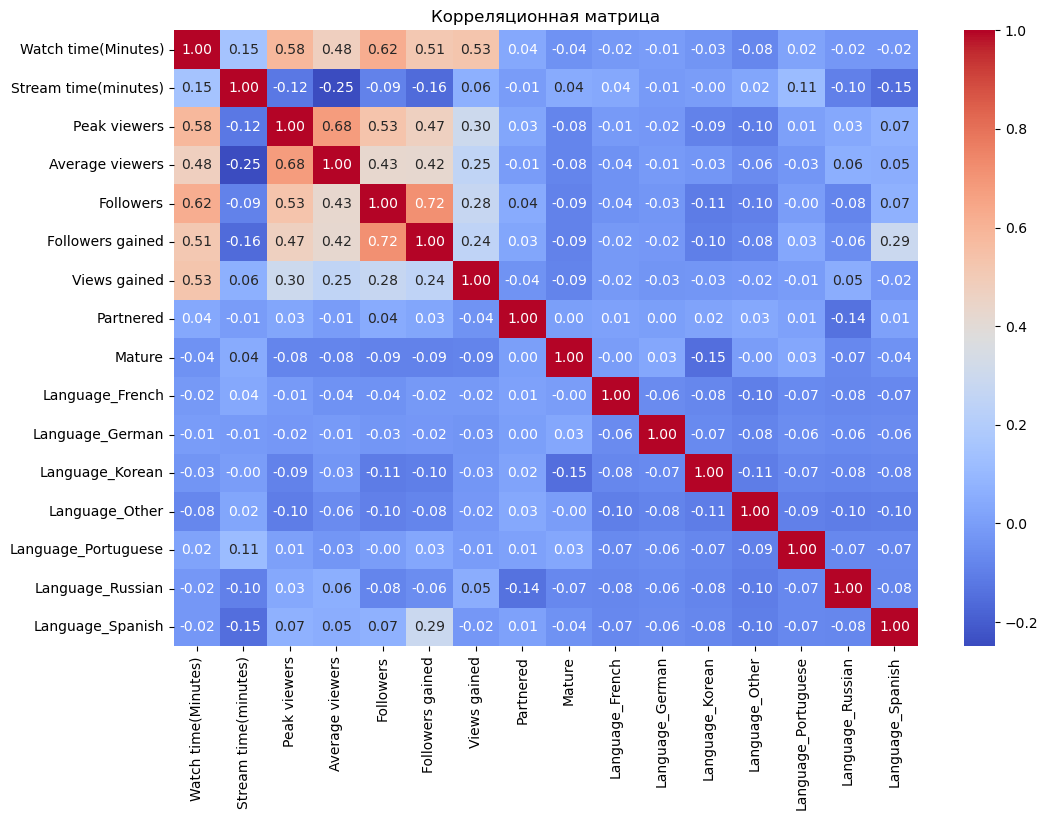

In [12]:
cor_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

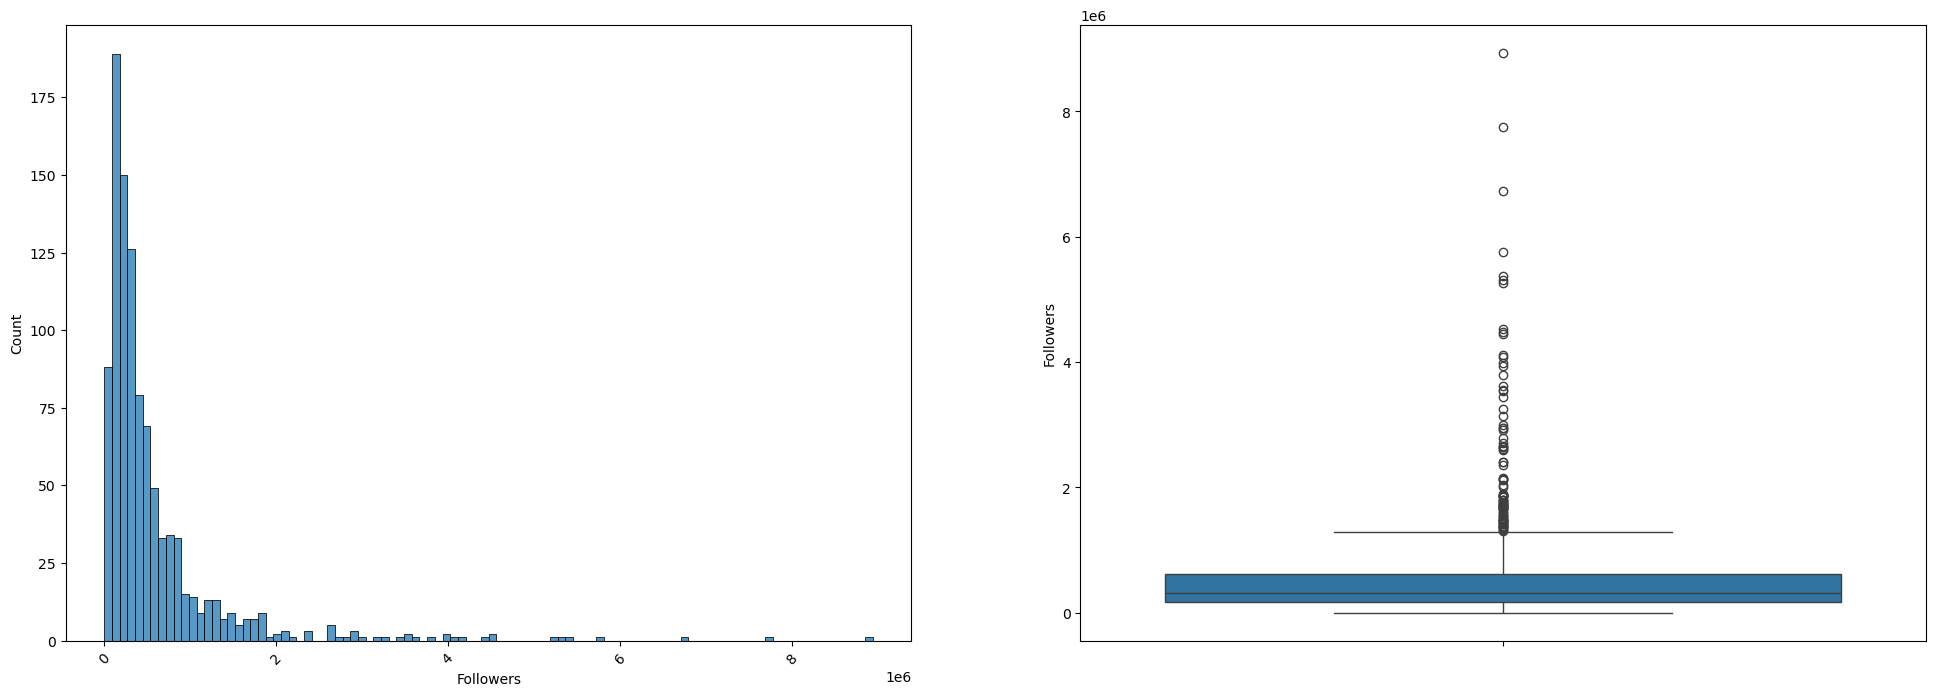

In [13]:
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.histplot(df['Followers'], bins=100);

plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.boxplot(df['Followers']);

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(["Followers"], axis=1),
    np.log1p(df["Followers"]),
    test_size=0.33,
    random_state=42
)

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape, X_train_scaled.shape, X_test_scaled.shape, Y_train.shape, Y_test.shape

((670, 15), (330, 15), (670, 15), (330, 15), (670,), (330,))

In [43]:
X_train_scaled[:5]

array([[-0.45287459,  0.76420145, -0.54571796, -0.58688994, -0.56848411,
         7.5329754 ,  0.14608718, -0.55091011, -0.26511797, -0.22760786,
        -0.26832816, -0.36298314, -0.26187887,  3.52136337, -0.28703824],
       [-0.11172987, -0.1143168 , -0.08420606, -0.37354294,  0.06178957,
        -0.21816335,  0.14608718, -0.55091011,  3.77190572, -0.22760786,
        -0.26832816, -0.36298314, -0.26187887, -0.28398092, -0.28703824],
       [-0.45900064, -0.14300382, -0.49369349, -0.50494106, -0.46139836,
        -0.54003096,  0.14608718, -0.55091011, -0.26511797, -0.22760786,
         3.72677996, -0.36298314, -0.26187887, -0.28398092, -0.28703824],
       [-0.41898156,  0.41926177, -0.51909429, -0.54428274, -0.52487489,
        -0.44277842,  0.14608718, -0.55091011, -0.26511797, -0.22760786,
         3.72677996, -0.36298314, -0.26187887, -0.28398092, -0.28703824],
       [10.66640766,  1.09210278,  3.23751618,  3.57695322,  4.23601247,
         5.92092113,  0.14608718, -0.55091011, 

In [45]:
Y_train[:5]

703    12.123120
311    13.302315
722    12.230970
629    11.568653
0      14.993026
Name: Followers, dtype: float64

### линейная регрессия

In [ ]:
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [ ]:
def model_train_test(X_train, y_train, X_test, y_test, model):
  """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param X_test: объекты тестовой выборки
  :param y_test: значения целевой переменной тестовой выборки
  :param model: модель, которая обучается и тестируется
  """
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  pred_train = model.predict(X_train)
  mse_test = mean_squared_error(y_test, pred)
  mse_train = mean_squared_error(y_train, pred_train)
  rmse_test = root_mean_squared_error(y_test, pred)
  rmse_train = root_mean_squared_error(y_train, pred_train)
  mae_test = mean_absolute_error(y_test, pred)
  mae_train = mean_absolute_error(y_train, pred_train)
  mape_test = mean_absolute_percentage_error(y_test, pred)
  mape_train = mean_absolute_percentage_error(y_train, pred_train)
  r2_test = r2_score(y_test, pred)
  r2_train = r2_score(y_train, pred_train)

  print(f'MAE_train: {mae_train:.4f}, MAE_test: {mae_test:.4f}')
  print(f'MAPE_train: {mape_train:.4f}, MAPE_test: {mape_test:.4f}')
  print(f'MSE_train: {mse_train:.4f}, MSE_test: {mse_test:.4f}')
  print(f'RMSE_train: {rmse_train:.4f}, RMSE_test: {rmse_test:.4f}')
  print(f'R2_train: {r2_train:.4f}, R2_test: {r2_test:.4f}')
  return pred, mse_test, r2_test

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
pred_lr = lr.predict(X_test)

pred_lr, mse_lr, r2_lr = model_train_test(
    X_train_scaled, 
    Y_train, 
    X_test_scaled, 
    Y_test, 
    lr
)

### knn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

def gridsearch(X_train, y_train, model, params, scoring="neg_mean_squared_error", cv=5):
  """Перебор всевозможных гиперпараметров.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param model: модель, для которой производится подбор гиперпараметров
  :param params: словарь с названиями гиперпараметрамов и всеми наборами значений
  :param scoring: функция, которая будет минимизироваться в ходе кросс-валидации
  :param cv: количество частей, на которые будет поделена выборка 

  :return: наилучшие гиперпараметры
  """ 
  searcher = GridSearchCV(
      model, 
      params,
      scoring=scoring,
      cv=cv
  )
  searcher.fit(X_train, y_train)
  best_params = searcher.best_params_

  print("Best hyperparameters:", best_params)
  return best_params

In [ ]:
best_params_knn = gridsearch(
    X_train, Y_train,
    KNeighborsRegressor(),
    {
        "n_neighbors": np.arange(1, 21), # default = 5
        "p": [1, 2], # default = 2
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], # default = "auto"
    }
)

knn_reg = KNeighborsRegressor(**best_params_knn)
pred_knn, mse_knn, r2_knn = model_train_test(
    X_train, 
    Y_train, 
    X_test, 
    Y_test, 
    knn_reg
)

In [ ]:
np.isinf(Y_train).sum(), np.isinf(Y_test).sum()

In [ ]:
best_params_knn_sc = gridsearch(
    X_train_scaled, Y_train,
    KNeighborsRegressor(),
    {
        "n_neighbors": np.arange(1, 21), # default = 5
        "p": [1, 2], # default = 2
        "algorithm": ["auto", "brute"], # default = "auto"
    }
)

knn_reg_sc = KNeighborsRegressor(**best_params_knn_sc)
pred_knn_sc, mse_knn, r2_knn = model_train_test(
    X_train_scaled, 
    Y_train, 
    X_test_scaled, 
    Y_test, 
    knn_reg_sc
)

In [ ]:
order = np.argsort(Y_test.values)
Y_test_ordered = Y_test.values[order]
pred_knn_ordered = pred_knn_sc[order]
pred_lr_ordered = pred_lr[order]

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(Y_test_ordered, pred_knn_ordered, label="kNN")
plt.scatter(Y_test_ordered, pred_lr_ordered, label="Linear Regression")

plt.plot(Y_test_ordered, Y_test_ordered, label="True values", color="red")
plt.legend();

plt.xlabel("True values");
plt.ylabel("Predicted values");

### Регрессионные деревья

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
best_params_dt = gridsearch(
    X_train, Y_train,
    DecisionTreeRegressor(),
    {
        "max_depth": [None, 10] + [i for i in range(50, 351, 50)], # default = None
        "min_samples_leaf": [i for i in range(1, 41)], # default = 1
        "max_features": [None, "auto", "sqrt", "log2"] # default = None
    }
)
tree_reg = DecisionTreeRegressor(**best_params_dt)
pred_dt, mse_dt, r2_dt = model_train_test(
    X_train, 
    Y_train, 
    X_test, 
    Y_test, 
    tree_reg
)

In [ ]:
best_params_dt = gridsearch(
    X_train_scaled, Y_train,
    DecisionTreeRegressor(),
    {
        "max_depth": [None, 10] + [i for i in range(50, 351, 50)], # default = None
        "min_samples_leaf": [i for i in range(1, 41)], # default = 1
        "max_features": [None, "auto", "sqrt", "log2"] # default = None
    }
)
tree_reg_sc = DecisionTreeRegressor(**best_params_dt)
pred_dt_sc, mse_dt_sc, r2_dt_sc = model_train_test(
    X_train_scaled, 
    Y_train, 
    X_test_scaled, 
    Y_test, 
    tree_reg_sc
)

In [ ]:
from sklearn import tree

plt.figure(figsize=(12, 10))
tree.plot_tree(tree_reg,feature_names=list(X_train), filled=True,);

In [ ]:
# Обрезанное дерево на глубину 2
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_reg,
               feature_names=list(X_train),
               filled=True,
              max_depth=2);

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(Y_test_ordered, pred_dt[order], label="Regression Tree")
plt.scatter(Y_test_ordered, pred_lr_ordered, label="Linear Regression")

plt.plot(Y_test_ordered, Y_test_ordered, label="True values", color="red")
plt.legend();

plt.xlabel("True values");
plt.ylabel("Predicted values");

### Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

def gridsearch(X_train, y_train, model, params, scoring="neg_mean_squared_error", cv=5):
  """Перебор всевозможных гиперпараметров.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param model: модель, для которой производится подбор гиперпараметров
  :param params: словарь с названиями гиперпараметрамов и всеми наборами значений
  :param scoring: функция, которая будет минимизироваться в ходе кросс-валидации
  :param cv: количество частей, на которые будет поделена выборка 

  :return: наилучшие гиперпараметры
  """ 
  searcher = GridSearchCV(
      model, 
      params,
      scoring=scoring,
      cv=cv
  )
  searcher.fit(X_train, y_train)
  best_params = searcher.best_params_

  print("Best hyperparameters:", best_params)
  return best_params

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

pred_rf, mse_rf, r2_rf = model_train_test(
    X_train, 
    Y_train, 
    X_test, 
    Y_test, 
    rf_regressor
)

In [ ]:
def get_train_and_test_Metric(estimator, param_name, grid, metric, X_train, y_train, X_test, y_test):
    '''
    Функция для оценки точности классификации 
    для заданных значений параметра param_name
    
    Параметры:
    1) model - применяемая модель
    1) param_name - название варьируемого параметра,
    2) grid - сетка значений параметра
    '''
        
    train_Metric, test_Metric = [], []
    
    for param_value in grid:
        model = estimator(**{param_name: param_value}, random_state=42)
        model.fit(X_train, y_train)
        train_Metric.append(metric(y_train, model.predict(X_train)))
        test_Metric.append(metric(y_test, model.predict(X_test)))
    return train_Metric, test_Metric

In [ ]:
def plot_dependence(param_name, estimator, grid=range(2, 50), metric=root_mean_squared_error, title=''):
    '''
    Функция для отображения графика зависимости accuracy 
    от значения параметра c названием param_name
    
    Параметры:
    1) param_name - название параметра, который собираемся варьировать,
    2) grid - сетка значений параметра,
    '''
    
    plt.figure(figsize=(12, 6))
    
    train_Metric, test_Metric = get_train_and_test_Metric(estimator, param_name, grid, metric, X_train, Y_train, X_test, Y_test)
        
    plt.plot(grid, train_Metric, label='train', lw=2)
    plt.plot(grid, test_Metric, label='test', lw=2)
    plt.legend(fontsize=14)
    plt.xlabel(param_name)
    plt.ylabel('Точность модели')
    plt.title(title, fontsize=20)
    plt.show()

In [ ]:
rf_regressor.get_params()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': [3, 5, 10],
    'min_samples_leaf': [1, 5, 7],
    'max_depth': [None, 15, 30, 40],
    'criterion': ['gini', 'entropy']
}



best_params_rf_reg = gridsearch(
    X_train, Y_train,
    RandomForestRegressor(),
    {
        "max_depth": [None, 15, 30, 40],
        "min_samples_leaf": [1, 5, 7],
        "max_features": [None, "auto", "sqrt", "log2"],
        "max_samples": [0.6, 0.8, 1.0]
    }
)
rf_regressor_param = RandomForestRegressor(**best_params_rf_reg)
pred_rf_reg, mse_rf_reg, r2_rf_reg = model_train_test(
    X_train, 
    Y_train, 
    X_test, 
    Y_test, 
    rf_regressor_param
)

In [ ]:
# Точность предсказания на отложенных данных
rf_regressor_oob = RandomForestRegressor(n_estimators=45, random_state=42, oob_score=True, bootstrap=True)
rf_regressor_oob.fit(X_train, Y_train)

# Получаем OOB прогнозы
oob_predictions = rf_regressor_oob.oob_prediction_

# Вычисляем различные метрики на OOB данных
print("OOB МЕТРИКИ")
print(f"R² Score: {r2_score(Y_train, oob_predictions):.4f}")
print(f"MAE: {mean_absolute_error(Y_train, oob_predictions):.4f}")
print(f"MSE: {mean_squared_error(Y_train, oob_predictions):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, oob_predictions)):.4f}")
print(f"MAPE: {mean_absolute_percentage_error(Y_train, oob_predictions):.4f}")


In [ ]:
# Отсортируем значения целевой переменной и предсказания
order = np.argsort(Y_test.values)
y_test_ordered = Y_test.values[order]
pred_rf_ordered = pred_rf[order]

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_rf_ordered, label="RandomForest")

plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")
plt.legend();

plt.xlabel("True values");
plt.ylabel("Predicted values");

In [ ]:
# Построим диаграмму важности переменных
features = X_train.columns
importances = rf_regressor_param.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title('Важность переменных')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
# Построим диаграмму важности переменных, оцененной с помощью перемешивания (permutation importances)
result = permutation_importance(
    rf_regressor_param, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2, scoring='explained_variance')

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Важность по перемешиванию (тестовое множество)")
ax.axvline(x=0, color="k", linestyle="--")
ax.figure.tight_layout()

In [ ]:
result = permutation_importance(
    rf_regressor_param, X_train, Y_train, n_repeats=10, random_state=42, n_jobs=2, scoring='explained_variance')

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Важность по перемешиванию (обучающее множество)")
ax.axvline(x=0, color="k", linestyle="--")
ax.figure.tight_layout()

### Метод XGBoost (Extreme Gradient Boosting)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

xgbreg = XGBRegressor(seed=42)
pred_xgbreg, mse_xgbreg, r2_xgbreg = model_train_test(
    X_train, 
    Y_train, 
    X_test, 
    Y_test, 
    xgbreg
)

In [ ]:
# Диаграмма важности переменных
features = X_train.columns
importances = xgbreg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title('Важность переменных')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [ ]:
xgbreg.get_params()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [ ]:
# Параметры для стохастического поиска
param_distributions = {
    'n_estimators': stats.randint(50, 500),
    'max_depth': stats.randint(3, 15),
    'learning_rate': stats.uniform(0.01, 0.3),  # от 0.01 до 0.31
    'subsample': stats.uniform(0.5, 0.5),  # от 0.5 до 1.0
    'colsample_bytree': stats.uniform(0.5, 0.5),  # от 0.5 до 1.0
    'gamma': stats.uniform(0, 5),  # от 0 до 5
    'reg_alpha': stats.uniform(0, 2),  # L1 регуляризация
    'reg_lambda': stats.uniform(0.5, 2),  # L2 регуляризация
    'min_child_weight': stats.randint(1, 10)
}

In [ ]:
# Модель для подбора параметров
xgbreg = XGBRegressor(
    random_state=42,
    n_jobs=-1, # запуск параллельных вычислений для ускорения процесса
    early_stopping_rounds=50  # ранняя остановка
)

In [ ]:
# Настройка RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgbreg,
    param_distributions=param_distributions,
    n_iter=50,  # количество случайных комбинаций
    cv=3,  # количество фолдов кросс-валидации
    scoring='neg_mean_squared_error',  # метрика для оптимизации
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(
    X_train, Y_train,
    eval_set=[(X_test, Y_test)],
    verbose=False
)

In [ ]:
best_params_xgb = random_search.best_params_

print("Best hyperparameters:", best_params_xgb)

In [ ]:
# Лучшая модель
best_xgb = XGBRegressor(**best_params_xgb)

In [ ]:
pred_xgbreg, mse_xgbreg, r2_xgbreg = model_train_test(
    X_train, 
    Y_train, 
    X_test, 
    Y_test, 
    best_xgb
)

In [ ]:
# Диаграмма важности переменных
features = X_train.columns
importances = best_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title('Важность переменных')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [ ]:
# Диаграмма важности переменных, оцененная с помощью перемешивания (permutation importances)

result = permutation_importance(
    best_xgb, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2, scoring='explained_variance')

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Важность по перемешиванию (тестовое множество)")
ax.axvline(x=0, color="k", linestyle="--")
ax.figure.tight_layout()

In [ ]:
order = np.argsort(Y_test.values)
y_test_ordered = Y_test.values[order]
pred_xgb_ordered = pred_xgbreg[order]



plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, pred_xgb_ordered, label="XGBoost")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")
plt.legend();

plt.xlabel("True values");
plt.ylabel("Predicted values");

### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
lgbmreg = LGBMRegressor(random_state=42, verbose=100)

In [ ]:
lgbmreg.fit(X_train, Y_train)
pred_lgbm, mse_lgbm, r2_lgbm = model_train_test(
    X_train, 
    Y_train,
    X_test,
    Y_test,
    lgbmreg
)

In [ ]:
lgbmreg.get_params()

In [ ]:
# Диаграмма важности переменных
features = X_train.columns
importances = lgbmreg.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title('Важность переменных')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [ ]:
order = np.argsort(Y_test.values)
y_test_ordered = Y_test.values[order]
pred_lgbm_ordered = pred_lgbm[order]



plt.figure(figsize=(10, 8))
plt.scatter(y_test_ordered, pred_lgbm_ordered, label="LightGBM")
plt.plot(y_test_ordered, y_test_ordered, label="True values", color="red")
plt.legend();

plt.xlabel("True values");
plt.ylabel("Predicted values");

линейная регрессия: MAE_train: 0.5491, MAE_test: 0.5844 MAPE_train: 0.0436, MAPE_test: 0.0466 MSE_train: 0.4933, MSE_test: 0.5911 RMSE_train: 0.7024, RMSE_test: 0.7688 R2_train: 0.5222, R2_test: 0.3424 

knn: MAE_train: 0.4425, MAE_test: 0.5557 MAPE_train: 0.0350, MAPE_test: 0.0442 MSE_train: 0.3219, MSE_test: 0.5256 RMSE_train: 0.5674, RMSE_test: 0.7250 R2_train: 0.6882, R2_test: 0.4153 

регрессионные деревья MAE_train: 0.4664, MAE_test: 0.5116 MAPE_train: 0.0370, MAPE_test: 0.0409 MSE_train: 0.3508, MSE_test: 0.4472 RMSE_train: 0.5923, RMSE_test: 0.6687 R2_train: 0.6603, R2_test: 0.5025 

случайный лес MAE_train: 0.2673, MAE_test: 0.4798 MAPE_train: 0.0213, MAPE_test: 0.0384 MSE_train: 0.1173, MSE_test: 0.4121 RMSE_train: 0.3425, RMSE_test: 0.6419 R2_train: 0.8864, R2_test: 0.5416 

xgboost MAE_train: 0.3608, MAE_test: 0.4733 MAPE_train: 0.0286, MAPE_test: 0.0378 MSE_train: 0.2115, MSE_test: 0.3870 RMSE_train: 0.4598, RMSE_test: 0.6221 R2_train: 0.7952, R2_test: 0.5694 

lightgbm MAE_train: 0.1826, MAE_test: 0.4877 MAPE_train: 0.0146, MAPE_test: 0.0389 MSE_train: 0.0623, MSE_test: 0.4184 RMSE_train: 0.2497, RMSE_test: 0.6468 R2_train: 0.9396, R2_test: 0.5346